# Introduction

##### This is a basic project offered by the Coding Club of Indian Institute of Technology, Guwahati (IIT Guwahati). The main aim of this project was to get familiar with the workflow and various techniques involved in a Machine Learning project.

## Steps involved in this basic DIY Machine Learning Project are:
1. Data Importing and Exploration
2. Handling Class Imbalance and missing values
3. Standardizing Data and Feature Selection
4. Train Model Using different techniques
5. Model Comparision

# Data Importing and Exploration
* We will use pandas framework to import the data and perform further analysis on it.
* PRCP column in the dataframe will be our target feature in this model. We have to replace all values greater than 0 as 1 (representing precipitation will occur), and values that are equal to 0 representing precipitation will not occur.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Loading Dataset

In [2]:
data = pd.read_csv(r'C:\Users\nagpa\Downloads\dataset.csv', parse_dates = ['DATE'])
data.head()
#data.DATE.dtype

,STATION,NAME,DATE,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,NaN,0.00,NaN,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,NaN,0.00,NaN,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,NaN,0.00,NaN,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,NaN,0.01,NaN,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,NaN,1.61,NaN,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


### Working on PRCP column (Target Column)

In [3]:
data.loc[data['PRCP'] > 0, 'PRCP'] = 1

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   STATION  1827 non-null   object        
 1   NAME     1827 non-null   object        
 2   DATE     1827 non-null   datetime64[ns]
 3   AWND     1823 non-null   float64       
 4   PGTM     62 non-null     float64       
 5   PRCP     1827 non-null   float64       
 6   TAVG     0 non-null      float64       
 7   TMAX     1827 non-null   int64         
 8   TMIN     1827 non-null   int64         
 9   WDF2     1822 non-null   float64       
 10  WDF5     1809 non-null   float64       
 11  WSF2     1823 non-null   float64       
 12  WSF5     1809 non-null   float64       
 13  WT01     551 non-null    float64       
 14  WT02     39 non-null     float64       
 15  WT08     861 non-null    float64       
dtypes: datetime64[ns](1), float64(11), int64(2), object(2)
memory usage: 228.5+ KB

In [5]:
data.shape

(1827, 16)

In [6]:
data.describe()

,AWND,PGTM,PRCP,TAVG,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
count,1823.000000,62.000000,1827.000000,0.0,1827.000000,1827.000000,1822.000000,1809.000000,1823.000000,1809.000000,551.0,39.0,861.0
mean,1.675710,1404.854839,0.091407,NaN,76.498632,58.120416,254.143798,256.428966,9.062095,14.721669,1.0,1.0,1.0
std,0.909434,350.813754,0.288265,NaN,9.133929,7.223756,54.756284,55.571902,2.016827,3.622257,0.0,0.0,0.0
min,0.000000,103.000000,0.000000,NaN,52.000000,38.000000,10.000000,10.000000,2.900000,6.000000,1.0,1.0,1.0
25%,1.120000,1337.500000,0.000000,NaN,70.000000,53.000000,260.000000,270.000000,8.100000,12.100000,1.0,1.0,1.0
50%,1.570000,1442.500000,0.000000,NaN,76.000000,58.000000,270.000000,270.000000,8.900000,14.100000,1.0,1.0,1.0
75%,2.010000,1545.000000,0.000000,NaN,83.000000,64.000000,270.000000,280.000000,10.100000,16.100000,1.0,1.0,1.0
max,8.050000,2314.000000,1.000000,NaN,111.000000,79.000000,360.000000,360.000000,21.000000,34.000000,1.0,1.0,1.0


# Visualizing Class Imbalance and  dealing with missing values
* In our dataset, there is an imbalance between examples where precipitation occurs or not. We will use seaborn/matplotlib to visualize it.
* Most of the ML algos used for classification were designed with the assumption of an equal no. of examples in each case. Therefore we need to balance it. This is done later using SMOTE to oversample the data.
* We will check for null values. If any feature contains many null values, we will drop it. We will convert the rest of the null values with mode.

## Visualizing Class Imbalance

<AxesSubplot:xlabel='PRCP', ylabel='count'>

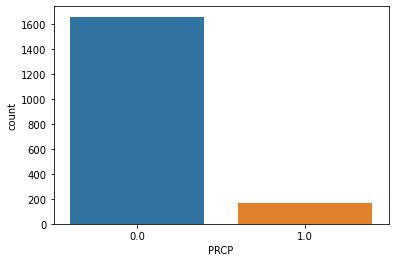

In [7]:
sns.countplot(x = 'PRCP',data = data)

#### Here we can clearly see the number of samples for the case when precipitation occurs is much less than for the case when precipitation does not occur. Hence, there is class imbalance

### Checking for Null Values

<AxesSubplot:>

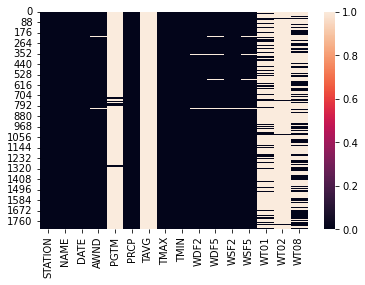

In [8]:
sns.heatmap(data.isnull())

#### Based on the heatmap, columns PGTM,TAVG have too many null values and shall be dropped. The rest of the cells with null values will be imputed with the mode value 

In [9]:
data = data.drop(['PGTM','TAVG'],axis = 'columns')
data.head()

,STATION,NAME,DATE,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-01,2.46,0.0,64,43,10.0,30.0,8.1,11.0,NaN,NaN,1.0
1,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-02,2.01,0.0,65,47,270.0,30.0,6.0,8.9,NaN,NaN,NaN
2,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-03,0.67,0.0,62,44,150.0,150.0,10.1,14.1,NaN,NaN,NaN
3,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-04,1.34,1.0,69,55,270.0,280.0,8.1,14.1,NaN,NaN,NaN
4,USW00093134,"LOS ANGELES DOWNTOWN USC, CA US",2016-01-05,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,NaN


### Performing some Exploratory Data Analysis on text and datetime features

In [10]:
#data.STATION.value_counts()
#Since all have same value, dropping this feature
data = data.drop(['STATION'],axis='columns')

In [11]:
#data.NAME.value_counts()
#Since all have same value, dropping this feature
data = data.drop(['NAME'],axis='columns')

In [12]:
#data.DATE.nunique()
#Since all values are different, dropping this row for now since this is the basic version of the model.
#Later, in the advanced version, will try to categorize based on d,m,y etc.
data = data.drop(['DATE'],axis = 'columns')

In [13]:
#finding and dropping duplicates
data.duplicated().sum()
data.drop_duplicates(inplace = True)
data.reset_index(drop=True, inplace=True)

In [14]:
#checking for remaining null values before performing simple imputation
data.isnull().any()

AWND     True
PRCP    False
TMAX    False
TMIN    False
WDF2     True
WDF5     True
WSF2     True
WSF5     True
WT01     True
WT02     True
WT08     True
dtype: bool

In [15]:
data['WT01'].fillna(value = 0,inplace = True)
data['WT02'].fillna(value = 0,inplace = True)
data['WT08'].fillna(value = 0,inplace = True)

In [16]:
data.head()

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,2.46,0.0,64,43,10.0,30.0,8.1,11.0,0.0,0.0,1.0
1,2.01,0.0,65,47,270.0,30.0,6.0,8.9,0.0,0.0,0.0
2,0.67,0.0,62,44,150.0,150.0,10.1,14.1,0.0,0.0,0.0
3,1.34,1.0,69,55,270.0,280.0,8.1,14.1,0.0,0.0,0.0
4,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,0.0


In [17]:
#imputing the null values with mode
for i in data.columns:
    if data[i].isnull().any():
        data[i].fillna(data[i].mode()[0], inplace=True)

In [18]:
#finally checking to see if all null values have been dealt with
data.isnull().any()

AWND    False
PRCP    False
TMAX    False
TMIN    False
WDF2    False
WDF5    False
WSF2    False
WSF5    False
WT01    False
WT02    False
WT08    False
dtype: bool

In [19]:
data.head()

,AWND,PRCP,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT08
0,2.46,0.0,64,43,10.0,30.0,8.1,11.0,0.0,0.0,1.0
1,2.01,0.0,65,47,270.0,30.0,6.0,8.9,0.0,0.0,0.0
2,0.67,0.0,62,44,150.0,150.0,10.1,14.1,0.0,0.0,0.0
3,1.34,1.0,69,55,270.0,280.0,8.1,14.1,0.0,0.0,0.0
4,2.46,1.0,59,49,140.0,140.0,10.1,16.1,1.0,1.0,0.0


<AxesSubplot:>

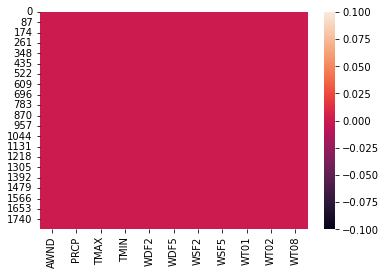

In [20]:
#Showing that all null values have been dealt with
sns.heatmap(data.isnull())

# Feature Selection and normalization of data
* Feature selection will be made using the chi-square test.
* We will normalize the data using MinMaxScaler.

## Feature Selection (Selecting features based on statistical analysis)

### Chi Square Test

In [21]:
from sklearn.feature_selection import chi2
X = data.drop(['PRCP'],axis='columns')
y = data.PRCP
chi_scores = chi2(X,y)
chi_scores

(array([7.89540059e+01, 3.18654327e+02, 5.39850740e+01, 2.30912516e+03,
        1.82729950e+03, 3.21620420e+01, 8.36563191e+01, 1.45290636e+02,
        9.97766923e-02, 9.96816253e+00]),
 array([6.35728987e-19, 2.84459091e-71, 2.02018428e-13, 0.00000000e+00,
        0.00000000e+00, 1.41834857e-08, 5.88717711e-20, 1.85532939e-33,
        7.52097777e-01, 1.59270363e-03]))

<AxesSubplot:>

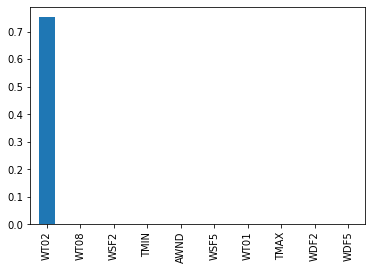

In [22]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = False , inplace = True)
p_values.plot.bar()

### Since WT02 has high p-value, it says that this variables is independent of the repsone and can not be considered for model training

In [23]:
data = X.drop(['WT02'],axis = 'columns')
data.head()

,AWND,TMAX,TMIN,WDF2,WDF5,WSF2,WSF5,WT01,WT08
0,2.46,64,43,10.0,30.0,8.1,11.0,0.0,1.0
1,2.01,65,47,270.0,30.0,6.0,8.9,0.0,0.0
2,0.67,62,44,150.0,150.0,10.1,14.1,0.0,0.0
3,1.34,69,55,270.0,280.0,8.1,14.1,0.0,0.0
4,2.46,59,49,140.0,140.0,10.1,16.1,1.0,0.0


In [24]:
#pip install imblearn

## Normalization (Setting a scale for all the features in the dataset)

In [25]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,precision_score,recall_score,confusion_matrix,classification_report
X_train,X_test,y_train,y_test = train_test_split(data,y,train_size = 0.8,stratify = y)
smote = SMOTE(random_state = 11)
X_train, y_train = smote.fit_resample(X_train, y_train)
scaler = MinMaxScaler()
X_w_train = scaler.fit_transform(X_train)
X_train_x = pd.DataFrame(X_w_train,columns = X_train.columns)
X_w_test = scaler.transform(X_test)
X_test_x = pd.DataFrame(X_w_test,columns = X_test.columns)

### Defining Scoring Function

In [26]:
# defining a function to evaluate my models based on certain metrics(all proposed ones except roc_auc which has been done separately)
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

# Implementing Different Models

### Logistic Regression

Best params: {'C': 24.420530945486497, 'penalty': 'l2'}
ROC_AUC score is : 0.9668674698795181
Test Result:
Accuracy Score: 90.68%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.986928   0.491525  0.906849    0.739227      0.942138
recall       0.909639   0.878788  0.906849    0.894213      0.906849
f1-score     0.946708   0.630435  0.906849    0.788572      0.918114
support    332.000000  33.000000  0.906849  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[302  30]
 [  4  29]]



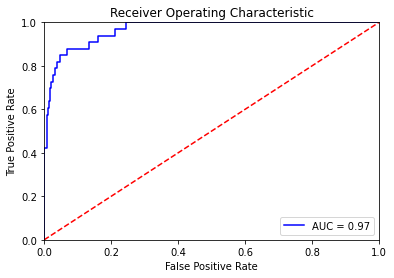

<AxesSubplot:>

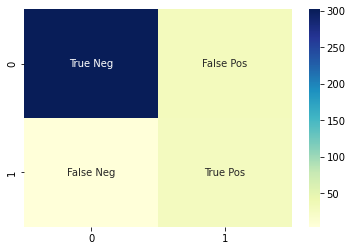

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C' : np.logspace(-4, 4, 50),'penalty' :['l2']} 

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5,scoring = 'roc_auc')
grid.fit(X_train_x, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

lr = LogisticRegression(**best_params)
lr.fit(X_train_x,y_train)
y_preds = lr.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(lr, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_x)),annot = labels,fmt='',cmap = "YlGnBu")

### Support Vector Classifier

Best params: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
ROC_AUC score is : 0.9373859072654254
Test Result:
Accuracy Score: 95.62%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.978788   0.742857  0.956164    0.860823      0.957457
recall       0.972892   0.787879  0.956164    0.880385      0.956164
f1-score     0.975831   0.764706  0.956164    0.870268      0.956743
support    332.000000  33.000000  0.956164  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[323   9]
 [  7  26]]



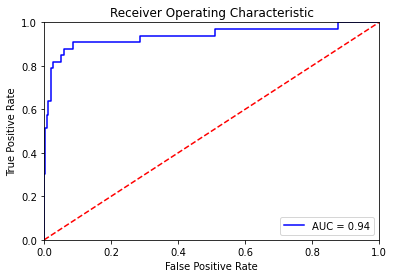

<AxesSubplot:>

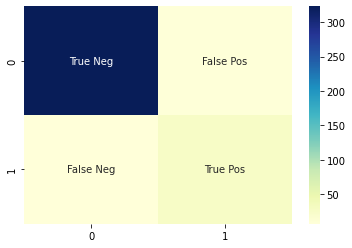

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 

grid = GridSearchCV(SVC(), param_grid,cv=5)
grid.fit(X_train_x, y_train)

best_params = grid.best_params_
print(f"Best params: {best_params}")

svm = SVC(**best_params,probability = True)
svm.fit(X_train_x, y_train)
y_preds = svm.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(svm, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, svm.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Decision Tree Classifier

ROC_AUC score is : 0.8395399780941949
Test Result:
Accuracy Score: 93.15%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.972308   0.600000  0.931507    0.786154      0.938647
recall       0.951807   0.727273  0.931507    0.839540      0.931507
f1-score     0.961948   0.657534  0.931507    0.809741      0.934426
support    332.000000  33.000000  0.931507  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[316  16]
 [  9  24]]



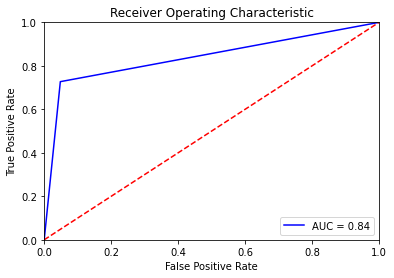

<AxesSubplot:>

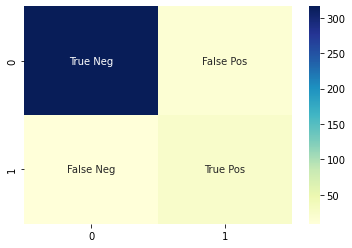

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

dt = DecisionTreeClassifier()
dt.fit(X_train_x, y_train)
y_preds = dt.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(dt, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Gaussian Naive Bayes

ROC_AUC score is : 0.9184921504198613
Test Result:
Accuracy Score: 88.22%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.964630   0.407407  0.882192    0.686019      0.914251
recall       0.903614   0.666667  0.882192    0.785141      0.882192
f1-score     0.933126   0.505747  0.882192    0.719437      0.894486
support    332.000000  33.000000  0.882192  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[300  32]
 [ 11  22]]



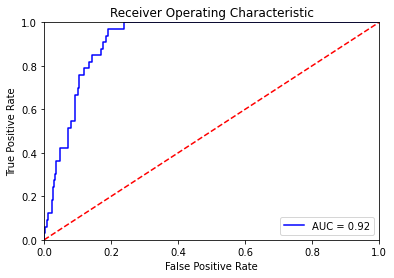

<AxesSubplot:>

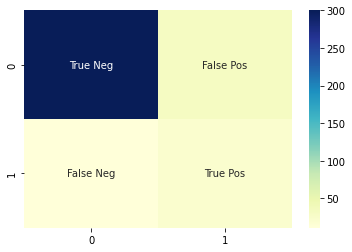

In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
# param_grid = {} 

# grid = GridSearchCV(GaussianNB(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

gnb = GaussianNB()
gnb.fit(X_train_x, y_train)
y_preds = gnb.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(gnb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, gnb.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Gradient Boosting Classifier

ROC_AUC score is : 0.9439576487769258
Test Result:
Accuracy Score: 94.25%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.966967   0.687500  0.942466    0.827233      0.941700
recall       0.969880   0.666667  0.942466    0.818273      0.942466
f1-score     0.968421   0.676923  0.942466    0.822672      0.942066
support    332.000000  33.000000  0.942466  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[322  10]
 [ 11  22]]



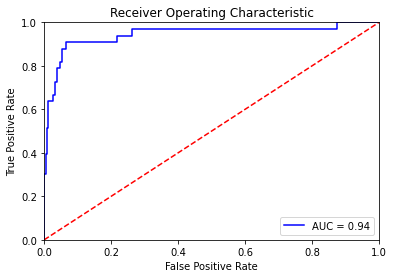

<AxesSubplot:>

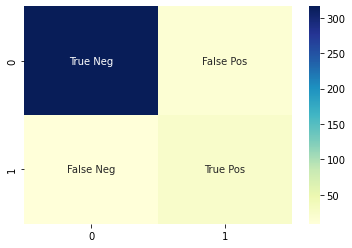

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
# param_grid = {} 

# grid = GridSearchCV(GradientBoostingClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

gb = GradientBoostingClassifier()
gb.fit(X_train_x, y_train)
y_preds = gb.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(gb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Random Forest Classifier

ROC_AUC score is : 0.9669587440671779
Test Result:
Accuracy Score: 94.79%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.967164   0.733333  0.947945    0.850249      0.946023
recall       0.975904   0.666667  0.947945    0.821285      0.947945
f1-score     0.971514   0.698413  0.947945    0.834963      0.946823
support    332.000000  33.000000  0.947945  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[324   8]
 [ 11  22]]



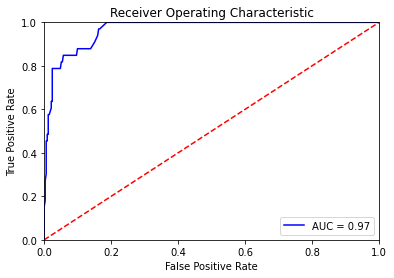

<AxesSubplot:>

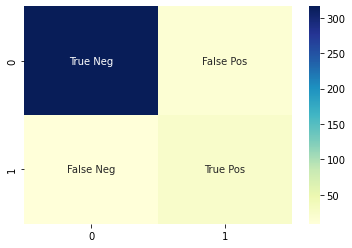

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

rf = RandomForestClassifier()
rf.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(rf, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### XGB Classifier

ROC_AUC score is : 0.9669587440671779
Test Result:
Accuracy Score: 95.62%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.973054   0.774194  0.956164    0.873624      0.955075
recall       0.978916   0.727273  0.956164    0.853094      0.956164
f1-score     0.975976   0.750000  0.956164    0.862988      0.955545
support    332.000000  33.000000  0.956164  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[325   7]
 [  9  24]]



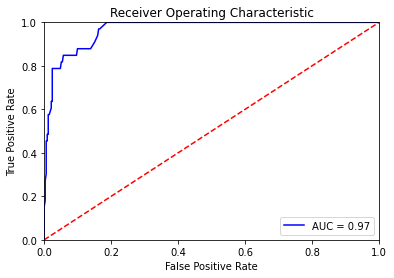

<AxesSubplot:>

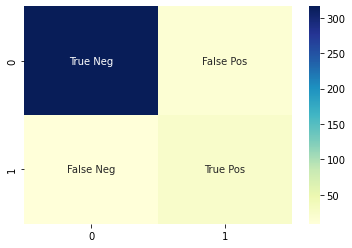

In [33]:
from xgboost import XGBClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

xgb = XGBClassifier(use_label_encoder=False, eval_metric = 'error')
xgb.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(xgb, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

### Cat Boost Classifier

ROC_AUC score is : 0.9669587440671779
Test Result:
Accuracy Score: 95.34%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.967359   0.785714  0.953425    0.876537      0.950936
recall       0.981928   0.666667  0.953425    0.824297      0.953425
f1-score     0.974589   0.721311  0.953425    0.847950      0.951690
support    332.000000  33.000000  0.953425  365.000000    365.000000
_______________________________________________
Confusion Matrix: 
 [[326   6]
 [ 11  22]]



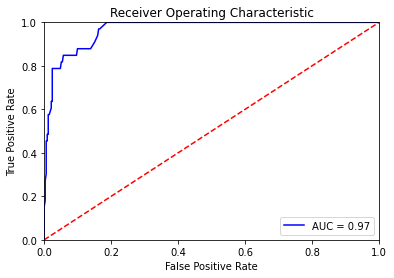

<AxesSubplot:>

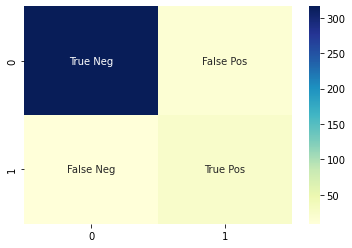

In [34]:
from catboost import CatBoostClassifier
# param_grid = {} 

# grid = GridSearchCV(DecisionTreeClassifier(), param_grid,cv=5)
# grid.fit(X_train_x, y_train)

# best_params = grid.best_params_
# print(f"Best params: {best_params}")

cat = CatBoostClassifier(logging_level='Silent')
cat.fit(X_train_x, y_train)
y_preds = rf.predict_proba(X_test_x)
print("ROC_AUC score is :",end = ' ')
print(roc_auc_score(y_test,y_preds[:,1]))
print_score(cat, X_train_x, y_train, X_test_x, y_test,train = False)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_preds[:,1])
roc_auc = metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(confusion_matrix(y_test, dt.predict(X_test_x)),annot = labels,fmt='',cmap = 'YlGnBu')

#### Applied Hyperparameter training for all models but it did not result in any significant improvement in most cases.

# Model Comparision

In [35]:
MLA = [lr,dt,gnb,svm,gb,rf,xgb,cat]

In [36]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)
index = 0
for alg in MLA:
    predicted = alg.fit(X_train_x, y_train).predict(X_test_x)
    fp, tp, th = metrics.roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[index,'MLA Name'] = MLA_name
    MLA_compare.loc[index, 'MLA Train Accuracy'] = round(alg.score(X_train_x, y_train), 4)
    MLA_compare.loc[index, 'MLA Test Accuracy'] = round(alg.score(X_test_x, y_test), 4)
    MLA_compare.loc[index, 'MLA Precission'] = precision_score(y_test, predicted)
    MLA_compare.loc[index, 'MLA Recall'] = recall_score(y_test, predicted)
    MLA_compare.loc[index, 'MLA AUC'] = metrics.auc(fp, tp)
    index+=1
MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)    
MLA_compare

,MLA Name,MLA Train Accuracy,MLA Test Accuracy,MLA Precission,MLA Recall,MLA AUC
3,SVC,0.9679,0.9562,0.742857,0.787879,0.880385
6,XGBClassifier,1.0000,0.9562,0.774194,0.727273,0.853094
7,CatBoostClassifier,0.9970,0.9534,0.785714,0.666667,0.824297
5,RandomForestClassifier,1.0000,0.9452,0.724138,0.636364,0.806134
4,GradientBoostingClassifier,0.9823,0.9425,0.687500,0.666667,0.818273
1,DecisionTreeClassifier,1.0000,0.9288,0.589744,0.696970,0.824388
0,LogisticRegression,0.8963,0.9068,0.491525,0.878788,0.894213
2,GaussianNB,0.8250,0.8822,0.407407,0.666667,0.785141


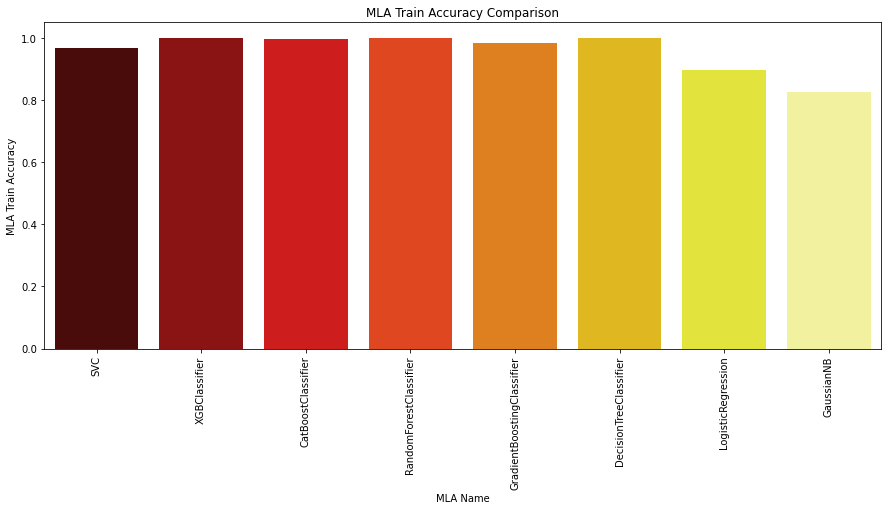

In [37]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot')
plt.xticks(rotation=90)
plt.title('MLA Train Accuracy Comparison')
plt.show()

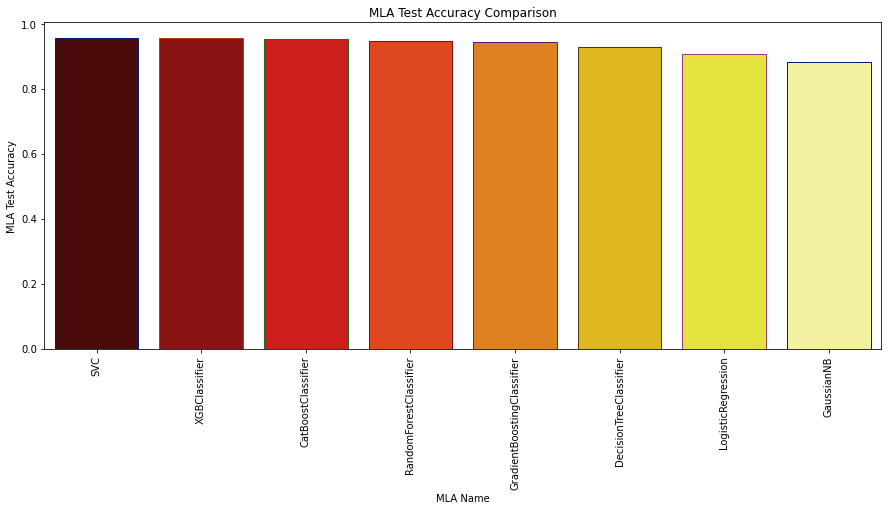

In [38]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Test Accuracy Comparison')
plt.show()

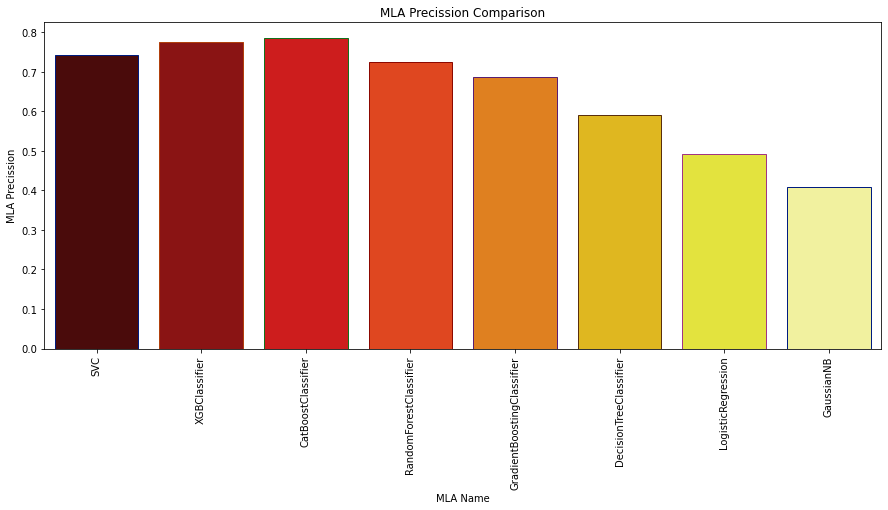

In [39]:
plt.subplots(figsize=(15,6))
sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Precission Comparison')
plt.show()

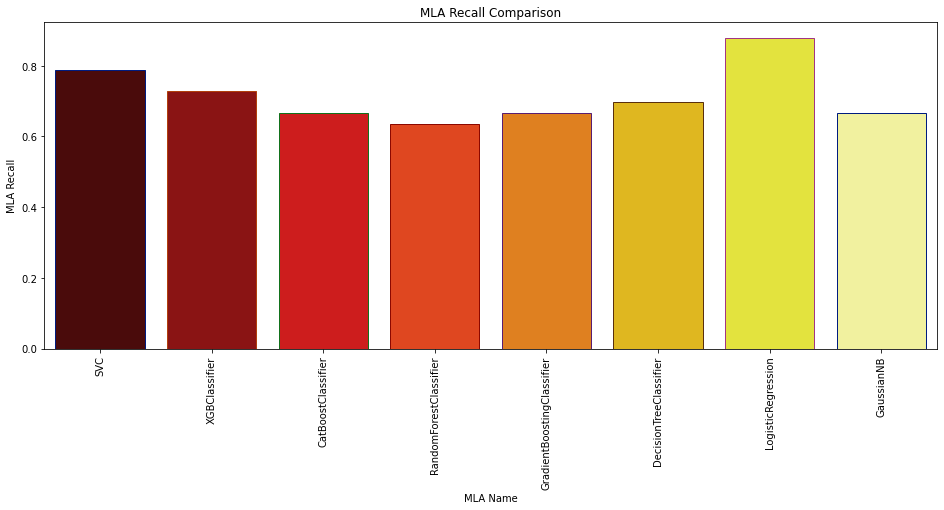

In [40]:
plt.subplots(figsize=(16,6))
sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.title('MLA Recall Comparison')
plt.show()

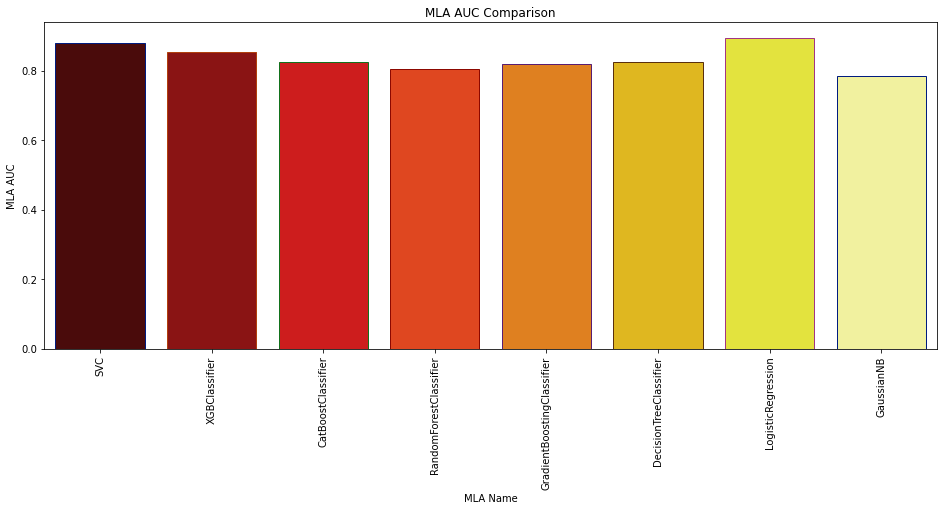

In [41]:
plt.subplots(figsize=(16,6))
sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation = 90)
plt.title('MLA AUC Comparison')
plt.show()

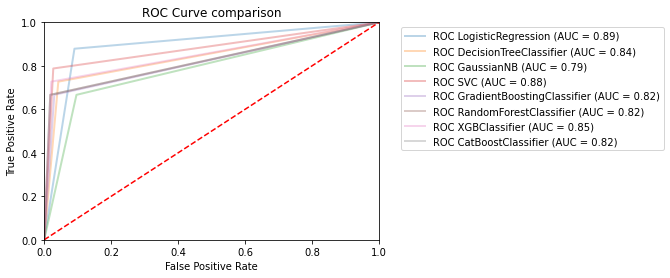

In [42]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train_x, y_train).predict(X_test_x)
    fp, tp, th = metrics.roc_curve(y_test, predicted)
    roc_auc_mla = metrics.auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()